In [1]:
%matplotlib inline
from __future__ import print_function, unicode_literals
import sys, os, glob
import re
import datetime as dt
import seaborn as sns
import json
import socket
from collections import OrderedDict

In [2]:
from pygaarst import raster
import viirstools as vt
import viirsswathtools as vst
import viirsifire as vif

In [3]:
reload(vt)
reload(vif)
reload(vst)

<module 'viirsswathtools' from 'viirsswathtools.pyc'>

In [4]:
import numpy as np
import matplotlib
import pygaarst
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

In [5]:
ALT1 = True
ALT2 = False 

basedir = '/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.edu/NPP/viirs/'
if ALT1:
    basedir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/'
elif ALT2:
    basedir = '/Volumes/SCIENCE/Fire/DATA_BY_AREA/2015/VIIRS/'

if os.path.isdir(basedir):
    print(basedir, "exists")
else:
    print("Please check directory {}: cannot access it.".format(basedir))

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/ exists


In [6]:
gisbasedir = "/Volumes/SCIENCE_mobile_Mac/GENERAL_GIS/"
firegisdir = "/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/AICC/2015_FirePerimeters/"

In [12]:
fireperims = os.path.join(firegisdir, "FirePerimeters")

In [7]:
viirsscenes = [
    (u'2015_07_06_187_2131', 2),
    (u'2015_07_06_187_2131', 3),
    (u'2015_07_06_187_2131', 4),
    (u'2015_07_06_187_2131', 5),
    (u'2015_07_06_187_2312', 3),
    (u'2015_07_06_187_2312', 4),
]

In [8]:
earth='cornsilk'
water='lightskyblue'

In [9]:
scenes = vt.getoverpasses(basedir, [scene[0] for scene in viirsscenes])
i04paths = [os.path.join(scenes[id]['dir'], scenes[id]['SVI04'][idx]) for id, idx in viirsscenes]
i05paths = [os.path.join(scenes[id]['dir'], scenes[id]['SVI05'][idx]) for id, idx in viirsscenes]
i03paths = [os.path.join(scenes[id]['dir'], scenes[id]['SVI03'][idx]) for id, idx in viirsscenes]
i02paths = [os.path.join(scenes[id]['dir'], scenes[id]['SVI02'][idx]) for id, idx in viirsscenes]
i01paths = [os.path.join(scenes[id]['dir'], scenes[id]['SVI01'][idx]) for id, idx in viirsscenes]

In [10]:
i04paths

[u'/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_07_06_187_2131/sdr/SVI04_npp_d20150706_t2133289_e2134531_b19118_c20150706215725357455_cspp_dev.h5',
 u'/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_07_06_187_2131/sdr/SVI04_npp_d20150706_t2134543_e2136185_b19118_c20150706215828862958_cspp_dev.h5',
 u'/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_07_06_187_2131/sdr/SVI04_npp_d20150706_t2136198_e2137439_b19118_c20150706220143967785_cspp_dev.h5',
 u'/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_07_06_187_2131/sdr/SVI04_npp_d20150706_t2137452_e2139093_b19118_c20150706220245941993_cspp_dev.h5',
 u'/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_07_06_187_2312/sdr/SVI04_npp_d20150706_t2315545_e2317187_b19119_c20150706233924880284_cspp_dev.h5',
 u'/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/2015_07_06_187_2312/sdr/SVI04_npp_d20

In [11]:
hughes_lon, hughes_lat = (-154.26, 66.04)
sample_lon, sample_lat = (-154.6, 66.0)
sceneidx = 2

In [13]:
sns.set(rc={'image.cmap': 'gist_heat'})
#sns.set(rc={'image.cmap': 'magma'})
sns.set_context("poster")

myfontsize = 20
font = {'family' : 'Calibri',
        'weight': 'bold',
        'size'   : myfontsize}
matplotlib.rc('font', **font)
matplotlib.axes.rcParams['axes.labelsize']=myfontsize-4
matplotlib.axes.rcParams['axes.titlesize']=myfontsize
cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))


In [14]:
i04file = i04paths[sceneidx]
i05file = i05paths[sceneidx]

cbarfraction = 0.05
cbarpad = 0.05

testscene04 = raster.VIIRSHDF5(i04file)
testscene05 = raster.VIIRSHDF5(i05file)
imin, imax, jmin, jmax = testscene04.crop(sample_lat, sample_lon, 50, 50)
print(
    testscene04.lats[testscene04.getnearestidx(sample_lat, sample_lon)], 
    testscene04.lons[testscene04.getnearestidx(sample_lat, sample_lon)]
)
datestamp = vt.getdatestamp_AKDT(testscene04)
pixq4 = testscene04.pixelquality[imin:imax, jmin:jmax]
pixq5 = testscene05.pixelquality[imin:imax, jmin:jmax]
# find row indices where no data present
excluderows = np.where((pixq4[:, 0] == 2) | (pixq4[:, -1] == 2) )
pixq4 = np.delete(pixq4, excluderows, 0)
pixq5 = np.delete(pixq5, excluderows, 0)

65.9986 -154.6


In [15]:
testscene04.meta

{u'Data_Product': {u'AggregateBeginningDate': u'20150706',
  u'AggregateBeginningGranuleID': u'NPP001168905804',
  u'AggregateBeginningOrbitNumber': u'19118',
  u'AggregateBeginningTime': u'213619.803439Z',
  u'AggregateEndingDate': u'20150706',
  u'AggregateEndingGranuleID': u'NPP001168905804',
  u'AggregateEndingOrbitNumber': u'19118',
  u'AggregateEndingTime': u'213743.979035Z',
  u'Instrument_Short_Name': u'VIIRS',
  u'N_Collection_Short_Name': u'VIIRS-I4-SDR',
  u'N_Dataset_Type_Tag': u'SDR',
  u'N_Processing_Domain': u'OPS'},
 u'Distributor': u'cspp',
 u'Mission_Name': u'NPP',
 u'N_Dataset_Source': u'all-',
 u'N_GEO_Ref': u'GITCO_npp_d20150706_t2136198_e2137439_b19118_c20150706220141848799_cspp_dev.h5',
 u'N_HDF_Creation_Date': u'20150706',
 u'N_HDF_Creation_Time': u'220143.967785Z',
 u'Number_of_Data_Products': u'1',
 u'Platform_Short_Name': u'NPP'}

In [16]:
rasterlist = []

In [17]:
excluderows

(array([ 8,  9, 10, 11, 40, 41, 42, 43, 72, 73, 74, 75]),)

## Make plots of bands

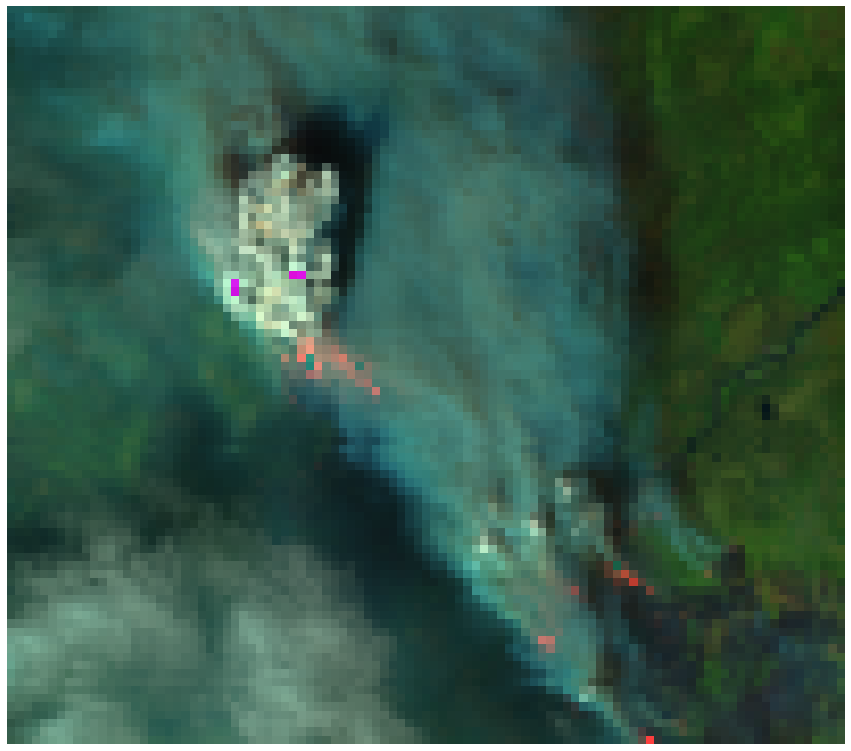

In [24]:
# zeroth plot: visible RGB, just for fun
SAVEFIG = False

plotrasters = []
for datapath in [i03paths, i02paths, i01paths]:
    scene = raster.VIIRSHDF5(datapath[sceneidx])
    bandname = scene.bandname
    testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
    mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
    plotraster = np.fliplr(testdat*mult + add)
    plotraster = np.delete(plotraster, excluderows, 0)
    plotrasters.append(plotraster)

rgbraster = np.dstack(plotrasters)
    
fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#dataplot = ax1.imshow(np.flipud(plotraster) , interpolation='nearest', cmap='bone')
dataplot = ax1.imshow(np.flipud(rgbraster), interpolation='nearest')
#ax1.set_title('Western Alaska: Overview plot from band {}, {}'.format(
#        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
if SAVEFIG:
    datestamp = vt.getdatestamp_AKDT(scene, spaces=False)
    outdir = '/Users/cwaigl/Dropbox/Research/PhD/2015VIRSPaper/NorthernYK/'
    outfn = 'VIIRSRGB_{}.pdf'.format(datestamp)
    plt.savefig(os.path.join(outdir, outfn), bbox_inches='tight', dpi=400)
plt.show()

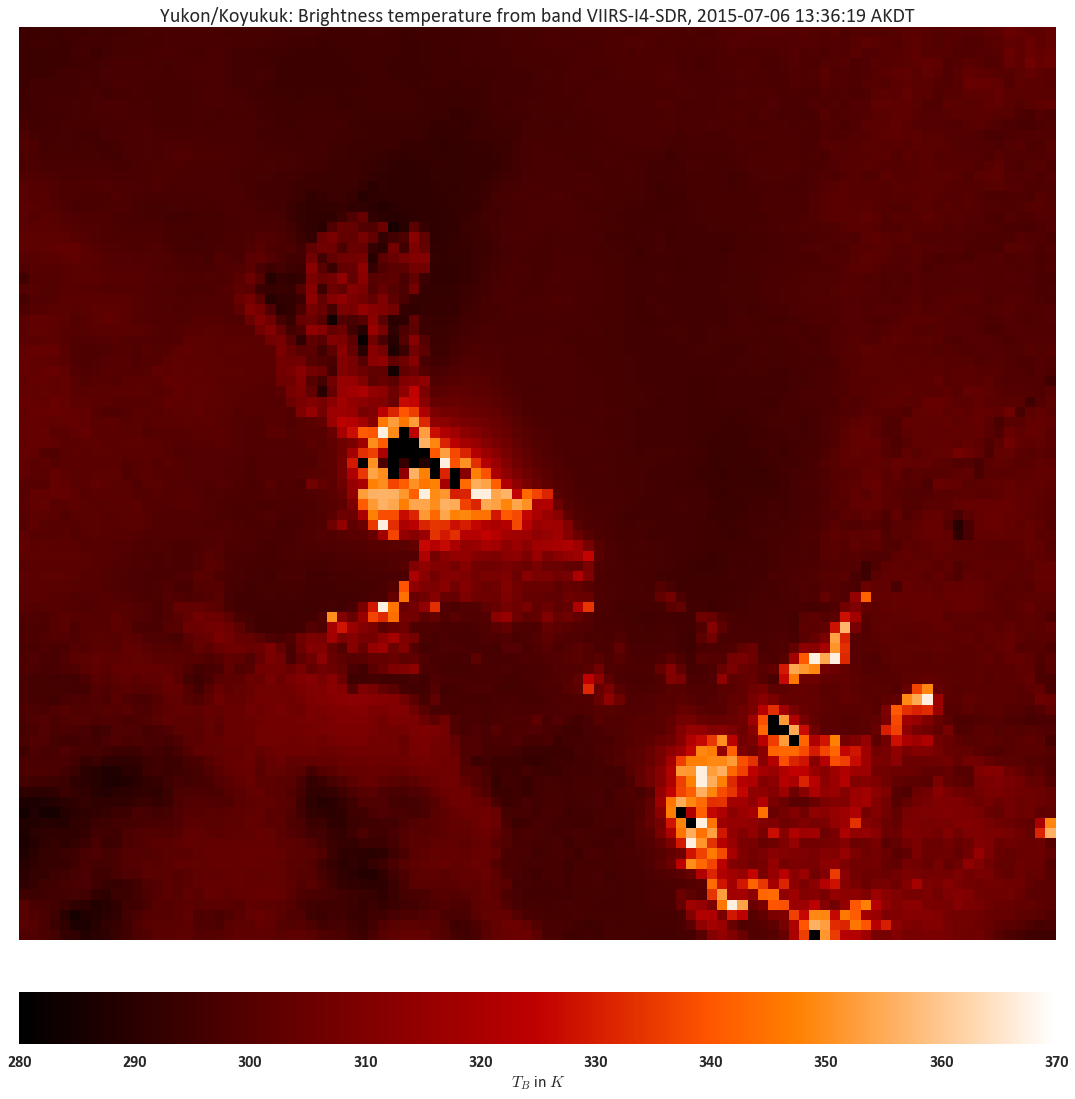

In [25]:
# first plot
SAVEFIG = False

scene = testscene04
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]

#plotraster = np.fliplr(testdat*mult + add)
#plotraster = np.delete(plotraster, excluderows, 0)
#rasterlist.append(plotraster)

testdat = testdat*mult + add
testdat = np.delete(testdat, excluderows, 0)
rasterlist.append(testdat)
plotraster = np.fliplr(testdat)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#dataplot = ax1.imshow(np.flipud(plotraster) , interpolation='nearest', vmin=280, vmax=370)
dataplot = ax1.pcolormesh(plotraster, vmin=280, vmax=370)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$T_B$ in $K$")
datestamp = vt.getdatestamp_AKDT(scene)
ax1.set_title('Yukon/Koyukuk: Brightness temperature from band {}, {}'.format(
        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
plt.show()
if SAVEFIG:
    datestamp = vt.getdatestamp_AKDT(scene, spaces=False)
    outdir = '/Users/cwaigl/Dropbox/Research/PhD/2015VIRSPaper/NorthernYK/'
    outfn = 'YK_VIIRS-I_{}_{}.png'.format(scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp)
    fig1.savefig(os.path.join(outdir, outfn), bbox_inches='tight', dpi=200)
    plt.close()

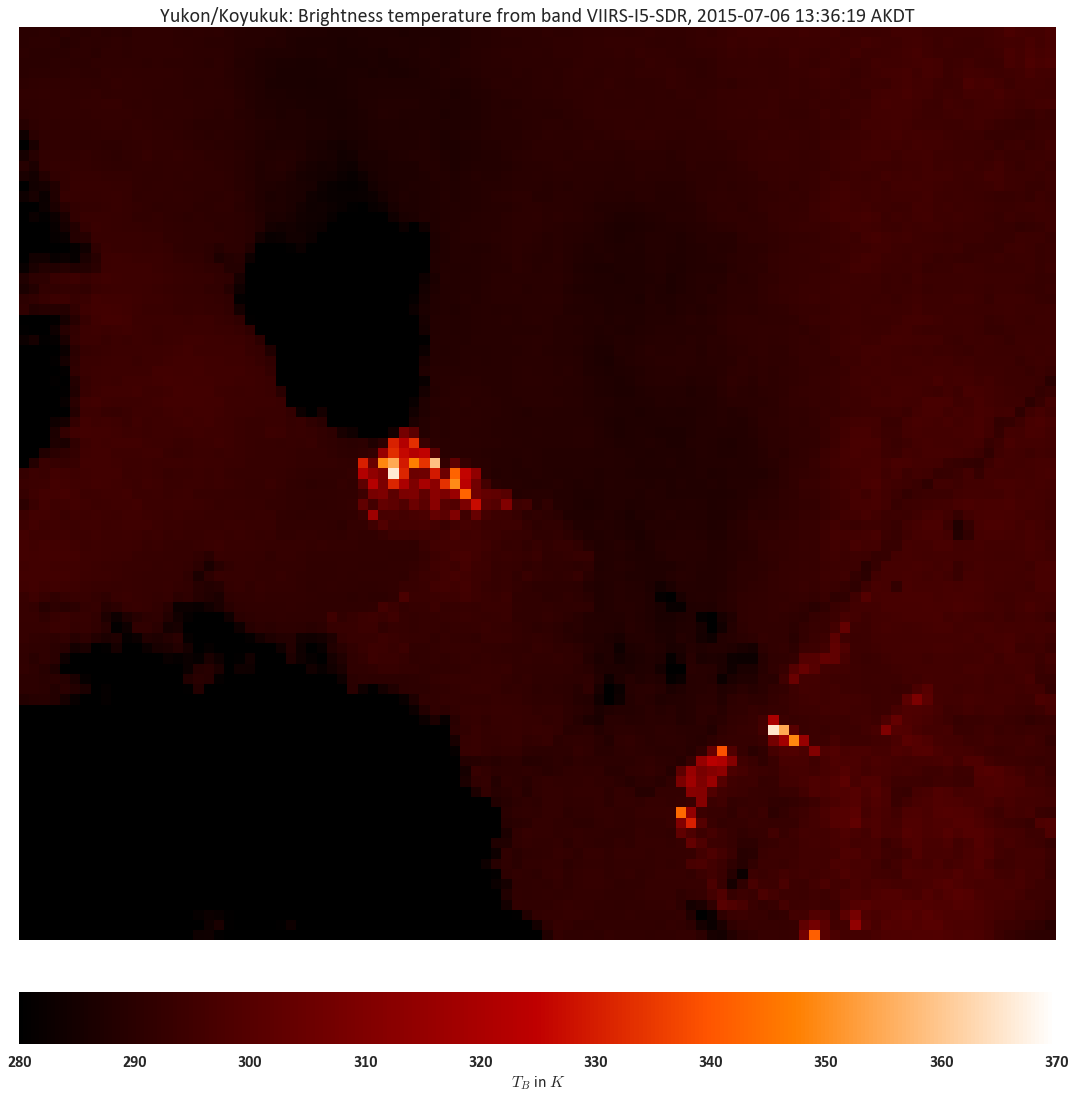

In [26]:
# second plot
SAVEFIG = True
scene = testscene05
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]

testdat = testdat*mult + add
testdat = np.delete(testdat, excluderows, 0)
rasterlist.append(testdat)
plotraster = np.fliplr(testdat)

plotraster_river = np.ma.masked_where(plotraster <= 295, np.ones(plotraster.shape))

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#dataplot = ax1.imshow(np.flipud(plotraster) , interpolation='nearest', vmin=280, vmax=370)
dataplot = ax1.pcolormesh(plotraster, vmin=280, vmax=370)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$T_B$ in $K$")
ax1.set_title('Yukon/Koyukuk: Brightness temperature from band {}, {}'.format(
        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
plt.show()
if SAVEFIG:
    datestamp = vt.getdatestamp_AKDT(scene, spaces=False)
    outdir = '/Users/cwaigl/Dropbox/Research/PhD/2015VIRSPaper/NorthernYK/'
    outfn = 'YK_VIIRS-I_{}_{}.png'.format(scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp)
    fig1.savefig(os.path.join(outdir, outfn), bbox_inches='tight', dpi=200)
    plt.close()

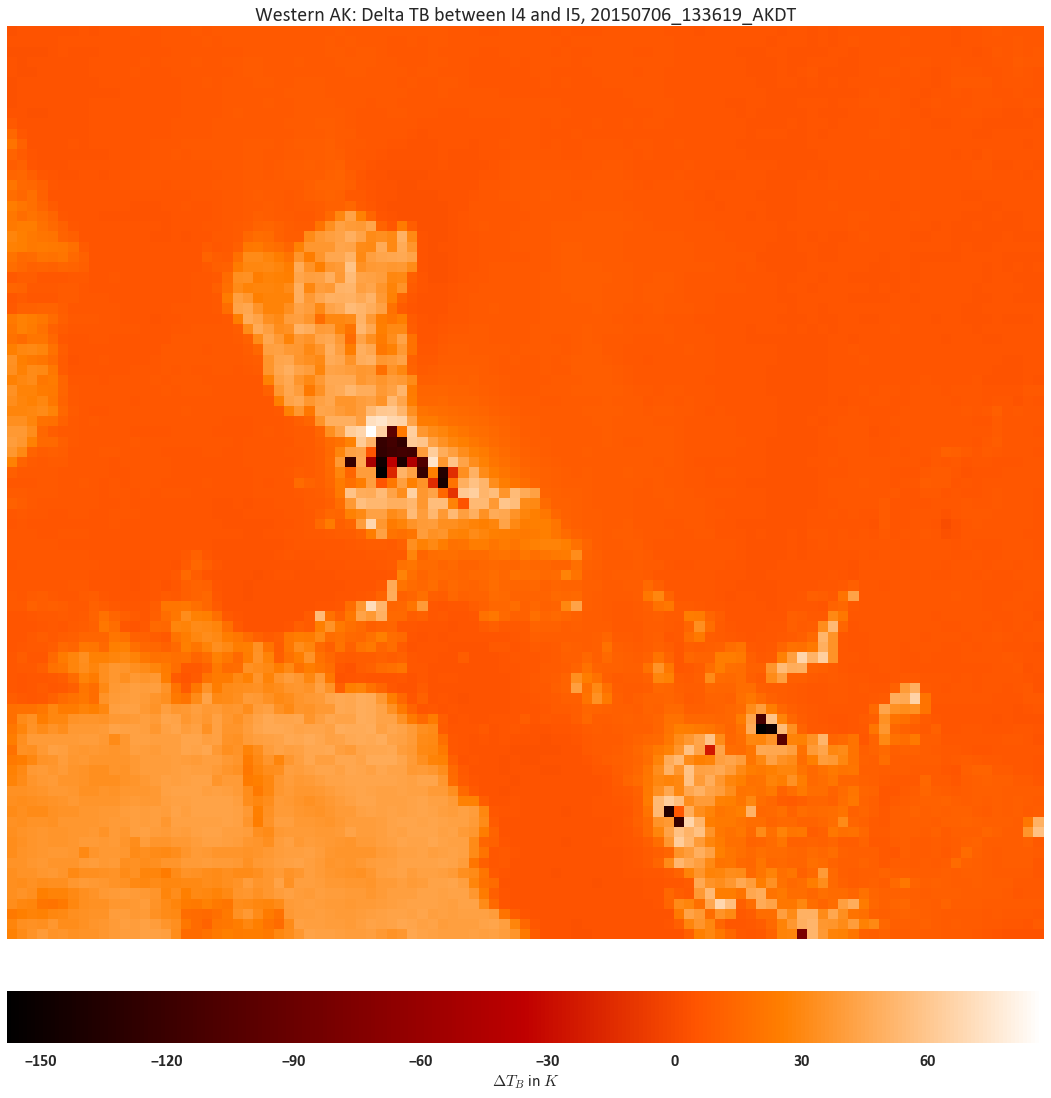

In [27]:
# third plot
plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  plotraster4 - plotraster5
plotraster45_masked = np.ma.masked_where(
    np.logical_and(plotraster45 <= 30, np.logical_or(
            pixq4 < 9, plotraster4 < 360)), np.ones(plotraster45.shape))
plotraster_cool = np.ma.masked_where(
    np.logical_or(plotraster45 <= 12, plotraster5 < 297), np.ones(plotraster45.shape))

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
dataplot = ax1.pcolormesh(np.fliplr(plotraster45))
#dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
#dataplot2 = ax1.pcolormesh(plotraster45_masked, vmin=0, vmax=1)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$\Delta T_B$ in $K$")
ax1.set_title('Western AK: Delta TB between I4 and I5, {}'.format(datestamp))
plt.show()

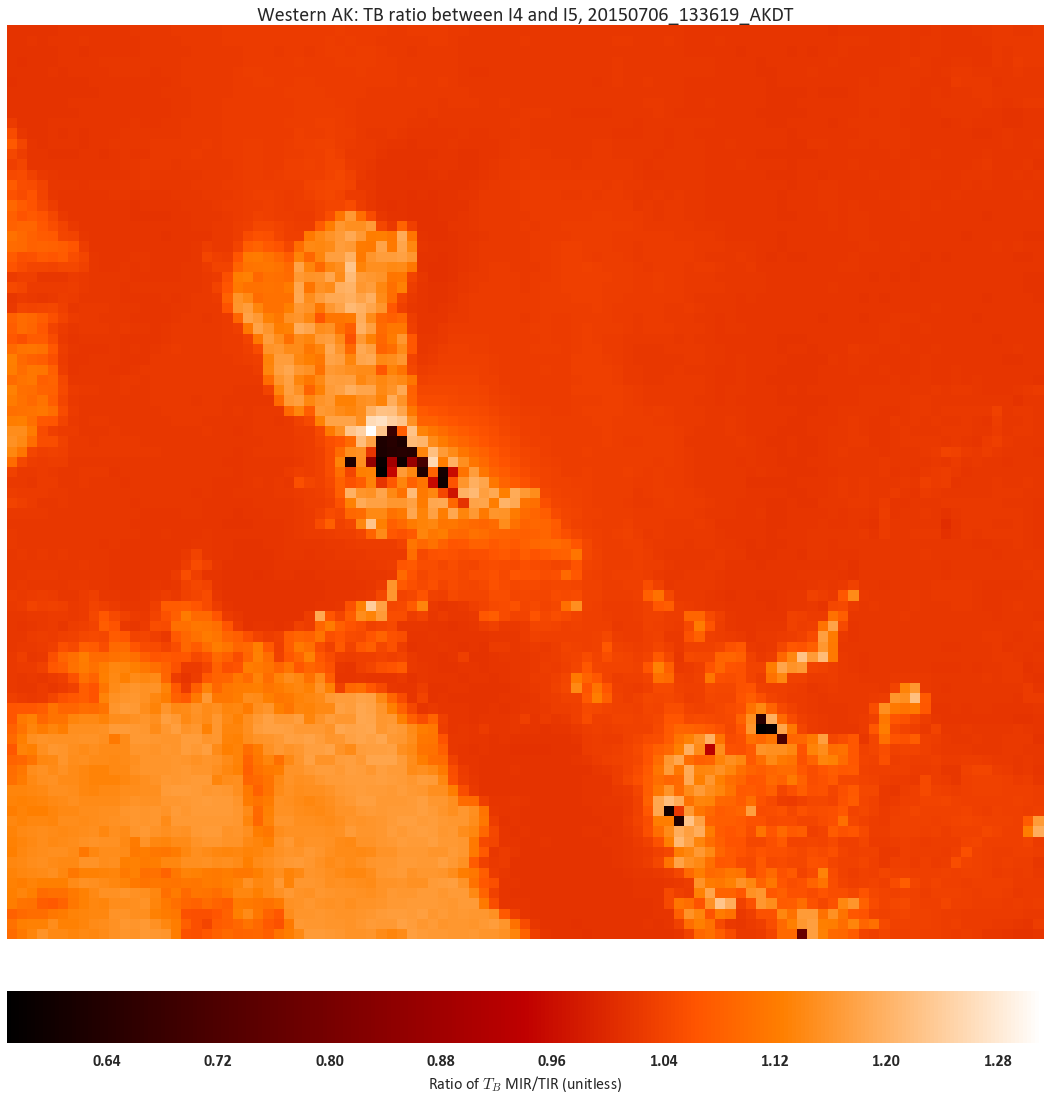

In [28]:
# fourth plot: ratio
plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  plotraster4 / plotraster5

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
dataplot = ax1.pcolormesh(np.fliplr(plotraster45))
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("Ratio of $T_B$ MIR/TIR (unitless)")
ax1.set_title('Western AK: TB ratio between I4 and I5, {}'.format(datestamp))
plt.show()


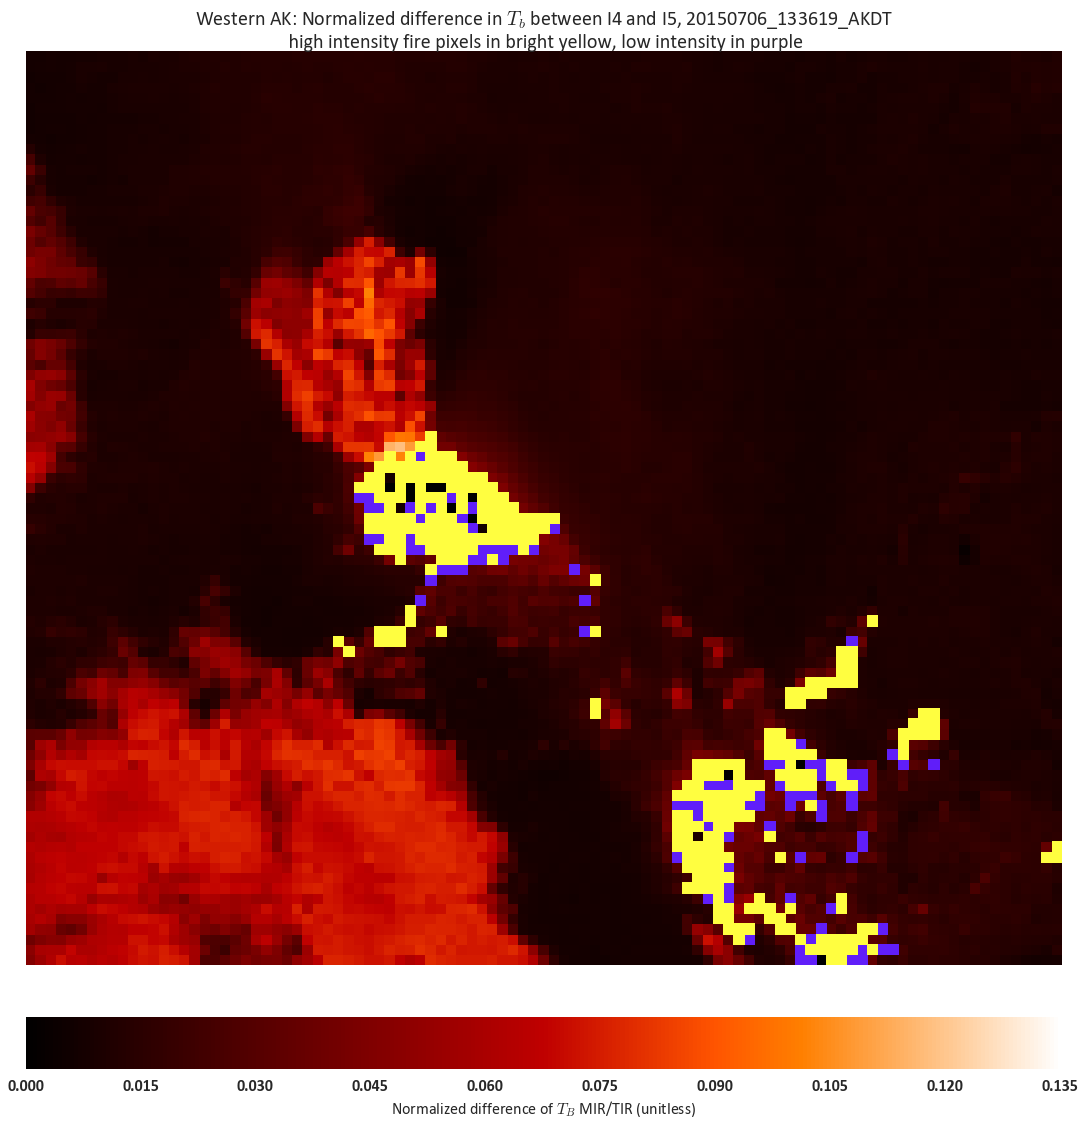

In [29]:
# fifth plot: normalized difference 
MASK = True


plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)

if MASK:
    anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
        plotraster4, plotraster5, pixq4, pixq5)
    hotcondition = np.logical_or(hotcondition, anomalouscondition)
    plotraster45_masked = np.ma.masked_where(~hotcondition, np.ones(plotraster45.shape))
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
    cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
    plottitle = 'Western AK: Normalized difference in $T_b$ between I4 and I5, {}\n high intensity fire pixels in bright yellow, low intensity in purple'.format(datestamp)
else:
    plottitle = 'Western AK: Normalized difference in $T_b$ between I4 and I5, {}'.format(datestamp)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
dataplot = ax1.pcolormesh(np.fliplr(plotraster45), vmin=0)    
if MASK:
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
ax1.set_title(plottitle)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("Normalized difference of $T_B$ MIR/TIR (unitless)")
plt.show()


## Investigate anomalies

Let's look in band 4 first.

In [30]:
y = np.bincount(pixq4.ravel())
vals = np.nonzero(y)[0]
zip(vals, y[vals])

[(0, 8954), (9, 15), (193, 20)]

In [31]:
for ii in vals:
    print("{0:b}".format(ii))
    print(np.where(pixq4 == ii))

0
(array([ 0,  0,  0, ..., 88, 88, 88]), array([  0,   1,   2, ...,  98,  99, 100]))
1001
(array([ 3,  9, 11, 15, 16, 23, 27, 27, 32, 40, 43, 43, 43, 46, 49]), array([31, 35, 34, 34, 34, 12, 21, 23, 65, 65, 55, 56, 61, 59, 65]))
11000001
(array([11, 12, 20, 20, 21, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 47, 48,
       48, 48, 49]), array([35, 36, 26, 27, 27, 58, 58, 60, 64, 62, 64, 67, 61, 62, 63, 64, 62,
       63, 64, 63]))


In [32]:
y = np.bincount(pixq5.ravel())
vals = np.nonzero(y)[0]
zip(vals, y[vals])

[(0, 8986), (65, 3)]

In [33]:
print(plotraster4[np.where(pixq5 == 65)])
print(plotraster5[np.where(pixq5 == 65)])
print(pixq4[np.where(pixq5 == 65)])

[ 208.          208.          253.32180786]
[ 365.16320801  365.85467529  358.97509766]
[193 193   0]


In [34]:
print(plotraster4[np.where(pixq4 == 193)])
print(plotraster5[np.where(pixq4 == 193)])
print(pixq5[np.where(pixq4 == 193)])

[ 208.  208.  208.  208.  208.  208.  208.  208.  208.  208.  208.  208.
  208.  208.  208.  208.  208.  208.  208.  208.]
[ 330.5335083   343.6293335   354.64373779  365.16320801  319.87713623
  349.58581543  342.37628174  329.29449463  365.85467529  347.4342041
  354.76660156  330.4352417   325.23693848  322.52017212  326.34606934
  333.01159668  333.32397461  321.97262573  330.92312622  307.50787354]
[ 0  0  0 65  0  0  0  0 65  0  0  0  0  0  0  0  0  0  0  0]


In [35]:
print(np.max(plotraster4), np.max(plotraster5))
print(plotraster4.shape, plotraster5.shape, pixq4.shape, pixq5.shape)

367.0 365.855
(89, 101) (89, 101) (89, 101) (89, 101)


In [36]:
print(plotraster4[np.where(pixq4 == 9)])
print(plotraster5[np.where(pixq4 == 9)])
print(pixq5[np.where(pixq4 == 9)])

[ 367.  367.  367.  367.  367.  367.  367.  367.  367.  367.  367.  367.
  367.  367.  367.]
[ 298.79608154  303.54510498  299.88415527  309.45947266  308.38189697
  301.39346313  302.52722168  299.91223145  296.10388184  299.32608032
  303.0501709   306.11791992  302.43945312  292.16564941  279.49102783]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
print(pixq4[np.where(plotraster4 == 367.0)])
print(pixq5[np.where(plotraster5 > 365)])

[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
[65 65]


In [38]:
bounds = np.append(vals, [255])

In [39]:
print((bounds[1:] + bounds[:-1])/2)


[ 32 160]


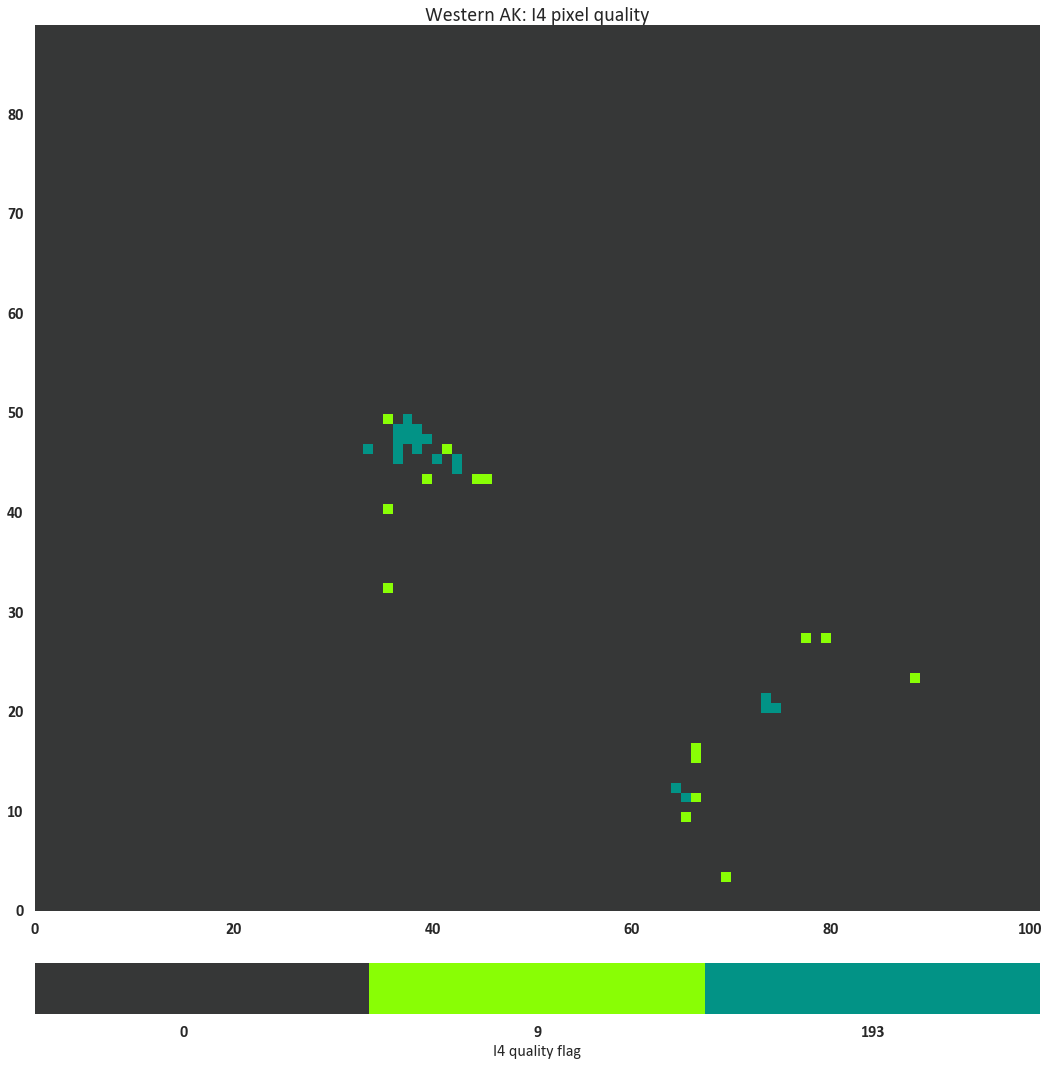

In [40]:
# fifth plot: quality raster 

#cmap_husl = matplotlib.colors.ListedColormap(sns.color_palette("husl", 256))
cmap_qflag =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['dark grey', 'lime green', 'teal']))

y = np.bincount(pixq4.ravel())
vals = np.nonzero(y)[0]
qflagbounds = np.append(vals, [255])
qflagnorm = matplotlib.colors.BoundaryNorm(qflagbounds, cmap_qflag.N)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])
#ax1.grid(False)
#dataplot = ax1.imshow(np.flipud(pixq4), interpolation='nearest', cmap=cmap_qflag, norm=qflagnorm)
dataplot = ax1.pcolormesh(
    np.fliplr(pixq4), 
    cmap=cmap_qflag, norm=qflagnorm)
ax1.set_aspect('equal')
ax1.set_xlim(0, pixq5.shape[1])
ax1.set_ylim(0, pixq5.shape[0])
plt.tight_layout()

cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("I4 quality flag")
labels = vals
loc = (qflagbounds[1:] + qflagbounds[:-1])/2
cbar.set_ticks(loc)
cbar.set_ticklabels(labels)
ax1.set_title('Western AK: I4 pixel quality'.format(datestamp))
plt.show()

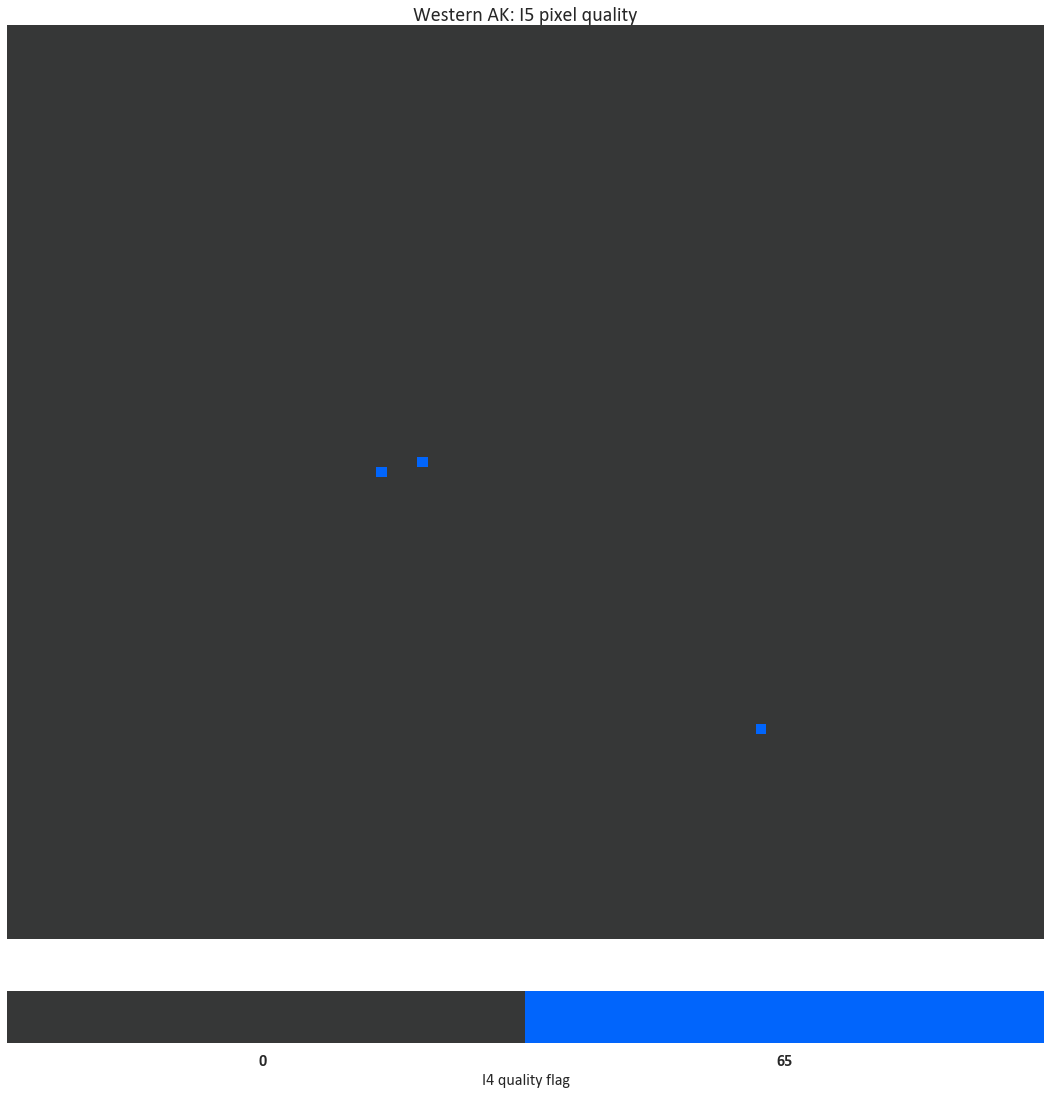

In [41]:
# sixth plot: I5 quality raster 

cmap_qflag =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['dark grey', 'bright blue']))
y = np.bincount(pixq5.ravel())
vals = np.nonzero(y)[0]
qflagbounds = np.append(vals, [255])
qflagnorm = matplotlib.colors.BoundaryNorm(qflagbounds, cmap_qflag.N)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)
dataplot = ax1.pcolormesh(
    np.fliplr(pixq5), 
    cmap=cmap_qflag, norm=qflagnorm)
ax1.set_aspect('equal')
ax1.set_xlim(0, pixq5.shape[1])
ax1.set_ylim(0, pixq5.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("I4 quality flag")
labels = vals
loc = (qflagbounds[1:] + qflagbounds[:-1])/2
cbar.set_ticks(loc)
cbar.set_ticklabels(labels)
ax1.set_title('Western AK: I5 pixel quality'.format(datestamp))
plt.show()

In [42]:
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
from shapely.geometry import box

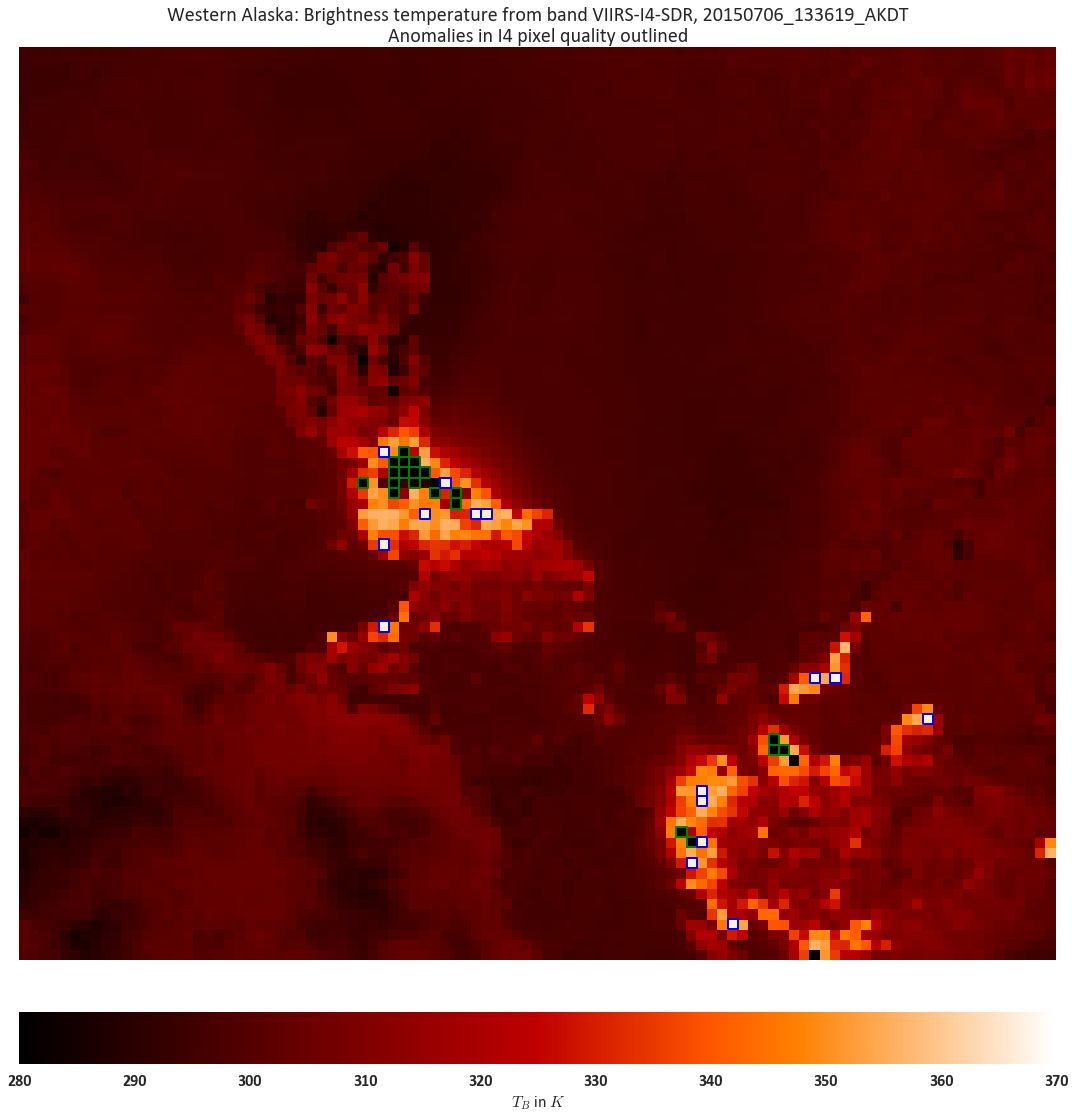

In [43]:
# plot of T4 with anomalous pixels marked
scene = testscene04
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]

testdat = testdat*mult + add
testdat = np.delete(testdat, excluderows, 0)
plotraster = np.fliplr(testdat)

cmap4_9 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'lime green']))
cmap4_193 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'teal']))
cmap5_65 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'bright blue']))
q4cond_9 = (pixq4 == 9)
q4cond_193 = (pixq4 == 193)
q5cond_65 = (pixq5 == 65)
q4_9_masked = np.ma.masked_where(~q4cond_9, np.ones(plotraster.shape))
q4_193_masked = np.ma.masked_where(~q4cond_193, np.ones(plotraster.shape))
q5_65_masked = np.ma.masked_where(~q5cond_65, np.ones(plotraster.shape))


fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#dataplot = ax1.imshow(np.flipud(plotraster) , interpolation='nearest', vmin=280, vmax=370)
dataplot = ax1.pcolormesh(plotraster, vmin=280, vmax=370)
#dataplotq4_9 = ax1.pcolormesh(np.fliplr(q4_9_masked), cmap=cmap4_9, vmin=0, vmax=1)
#dataplotq4_193 = ax1.pcolormesh(np.fliplr(q4_193_masked), cmap=cmap4_193, vmin=0, vmax=1)
#dataplotq5_65 = ax1.pcolormesh(np.fliplr(q5_65_masked), cmap=cmap5_65, alpha=.2, vmin=0, vmax=1)
iis, jjs =  np.where(np.fliplr(pixq4) == 193)
for ii, jj in zip(iis, jjs):
    y, x = box(ii, jj, ii+1, jj+1).boundary.xy
    ax1.plot(x, y, color='green', linewidth=2, zorder=5)
iis, jjs =  np.where(np.fliplr(pixq4) == 9)
for ii, jj in zip(iis, jjs):
    y, x = box(ii, jj, ii+1, jj+1).boundary.xy
    ax1.plot(x, y, color='blue', linewidth=2, zorder=5)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$T_B$ in $K$")
ax1.set_title('Western Alaska: Brightness temperature from band {}, {}\nAnomalies in I4 pixel quality outlined'.format(
        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
plt.savefig("testfires")
plt.show()

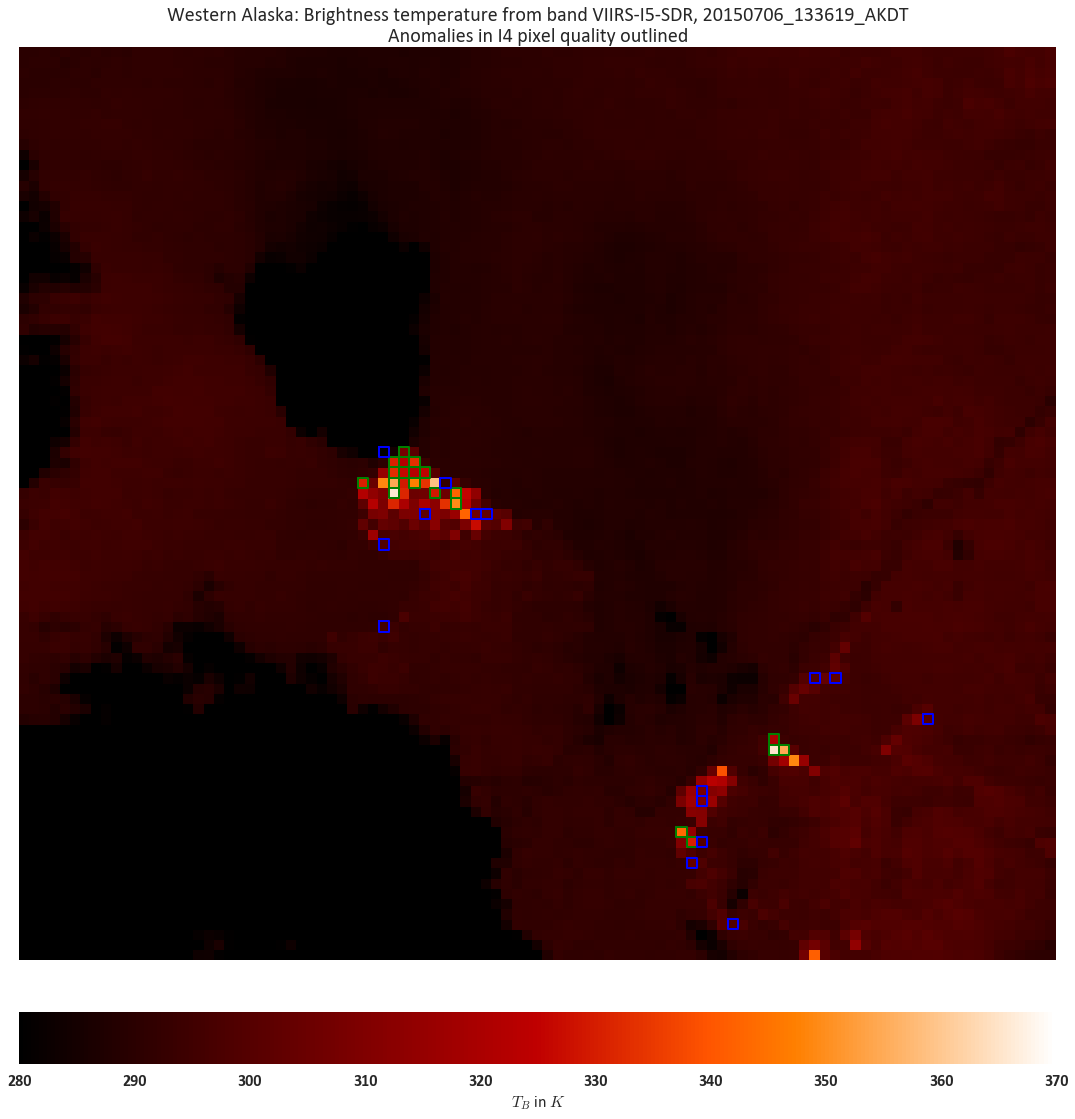

In [44]:
# second plot
scene = testscene05
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]

testdat = testdat*mult + add
testdat = np.delete(testdat, excluderows, 0)
rasterlist.append(testdat)
plotraster = np.fliplr(testdat)

plotraster_river = np.ma.masked_where(plotraster <= 295, np.ones(plotraster.shape))

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#dataplot = ax1.imshow(np.flipud(plotraster) , interpolation='nearest', vmin=280, vmax=370)
dataplot = ax1.pcolormesh(plotraster, vmin=280, vmax=370)
iis, jjs =  np.where(np.fliplr(pixq4) == 193)
for ii, jj in zip(iis, jjs):
    y, x = box(ii, jj, ii+1, jj+1).boundary.xy
    ax1.plot(x, y, color='green', linewidth=2, zorder=5)
iis, jjs =  np.where(np.fliplr(pixq4) == 9)
for ii, jj in zip(iis, jjs):
    y, x = box(ii, jj, ii+1, jj+1).boundary.xy
    ax1.plot(x, y, color='blue', linewidth=2, zorder=5)


ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$T_B$ in $K$")
ax1.set_title('Western Alaska: Brightness temperature from band {}, {}\nAnomalies in I4 pixel quality outlined'.format(
        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
plt.show()

In [45]:
iis, jjs =  np.where(pixq4 == 9)
zip(iis, jjs)

[(3, 31),
 (9, 35),
 (11, 34),
 (15, 34),
 (16, 34),
 (23, 12),
 (27, 21),
 (27, 23),
 (32, 65),
 (40, 65),
 (43, 55),
 (43, 56),
 (43, 61),
 (46, 59),
 (49, 65)]

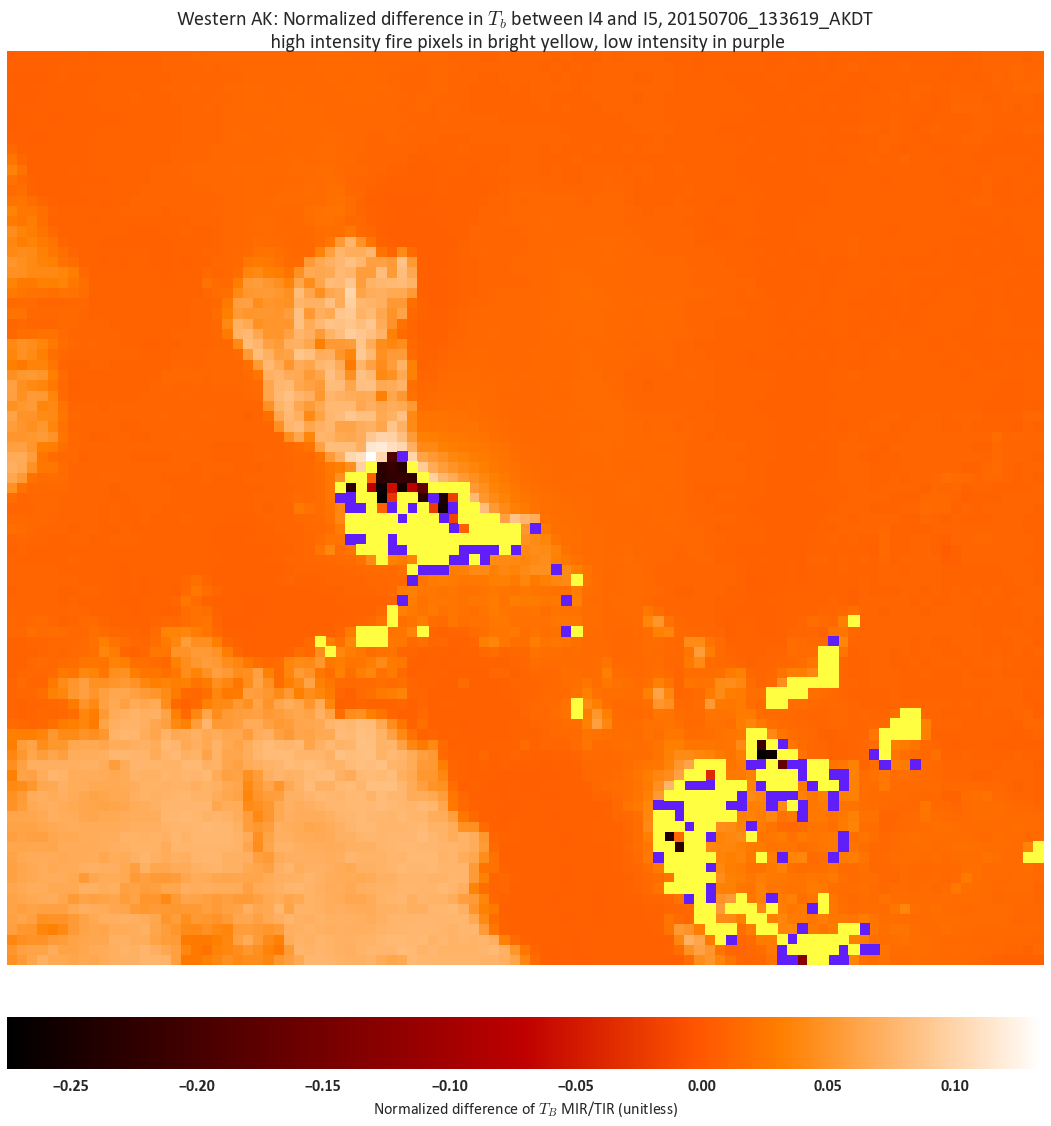

In [46]:
# sith plot: normalized difference 
MASK = True

plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)

if MASK:
    hotcondition = np.logical_or(plotraster45 >= 0.05, np.logical_and(pixq4 == 9, plotraster4 < 360))
    hotcondition = np.logical_and(np.logical_and(hotcondition, plotraster4 > 320), plotraster5 > 290)
    plotraster45_masked = np.ma.masked_where(~hotcondition, np.ones(plotraster45.shape))
    warmcondition = np.logical_or(plotraster45 >= 0.02, np.logical_and(plotraster45 >= 0.015, plotraster5>=308))
    warmcondition = np.logical_and(np.logical_and(warmcondition, plotraster4 > 320), plotraster5 > 290)
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
    cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
    plottitle = 'Western AK: Normalized difference in $T_b$ between I4 and I5, {}\n high intensity fire pixels in bright yellow, low intensity in purple'.format(datestamp)
else:
    plottitle = 'Western AK: Normalized difference in $T_b$ between I4 and I5, {}'.format(datestamp)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
dataplot = ax1.pcolormesh(np.fliplr(plotraster45))    
if MASK:
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
ax1.set_title(plottitle)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("Normalized difference of $T_B$ MIR/TIR (unitless)")
plt.show()


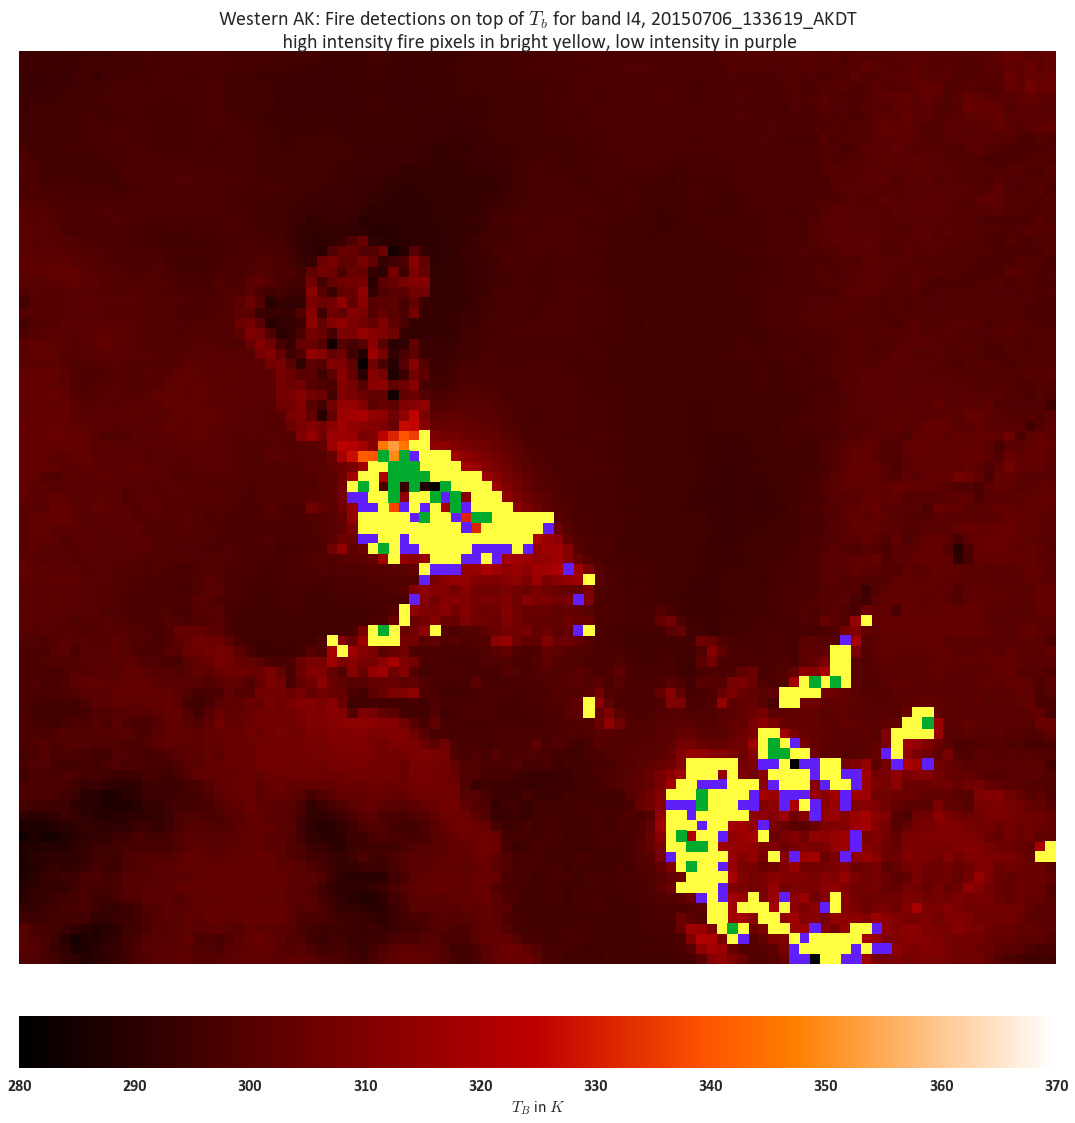

In [47]:
# masks on top of 4 micrometer band

plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
i4tb = plotraster4
i5tb = plotraster5
i45 = plotraster45

anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
        plotraster4, plotraster5, pixq4, pixq5)

plotraster45_masked = np.ma.masked_where(~hotcondition, np.ones(plotraster45.shape))
plotraster_cool = np.ma.masked_where(
    ~warmcondition, np.ones(plotraster45.shape))
plotraster45_anomalousmasked = np.ma.masked_where(
    ~anomalouscondition, np.ones(plotraster45.shape))

cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))

plottitle = 'Western AK: Fire detections on top of $T_b$ for band I4, {}\n high intensity fire pixels in bright yellow, low intensity in purple'.format(datestamp)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)

dataplot = ax1.pcolormesh(np.fliplr(plotraster4), vmin=280, vmax=370)    
dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
dataplot1 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
ax1.set_title(plottitle)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()

cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$T_B$ in $K$")
plt.show()


In [48]:
MASK = True
PLOTB4 = False

sceneidx = 2
deli = 500
delj = 500

i4sc = raster.VIIRSHDF5(i04paths[sceneidx])
i5sc = raster.VIIRSHDF5(i05paths[sceneidx])
imin, imax, jmin, jmax = i4sc.crop(sample_lat, sample_lon, deli, delj)

ascendingnode = True
middlelatdelta = i4sc.lats[-1, 3200] - i4sc.lats[0, 3200]
if middlelatdelta < 0:
    ascendingnode = False 
i4sc.ascendingnode = ascendingnode
skips = vst.get_skips(i4sc, imin=imin, imax=imax, jmin=jmin, jmax=jmax)

lons = i4sc.lons[imin:imax, jmin:jmax]
lats = i4sc.lats[imin:imax, jmin:jmax]

mult, add = i4sc.I4['BrightnessTemperatureFactors'][:]
i4tb = i4sc.I4['BrightnessTemperature'][imin:imax, jmin:jmax]
plotraster4 = i4tb * mult + add
mult, add = i5sc.I5['BrightnessTemperatureFactors'][:]
i5tb = i5sc.I5['BrightnessTemperature'][imin:imax, jmin:jmax]
plotraster5 = i5tb * mult + add
pixq4 = i4sc.pixelquality[imin:imax, jmin:jmax]
pixq5 = i5sc.pixelquality[imin:imax, jmin:jmax]

plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)


datestamp = vt.getdatestamp_AKDT(i4sc)

nightscene = True
solzenithangles = i4sc.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
satazimuthangles = i4sc.geodata['SatelliteAzimuthAngle'][imin:imax, jmin:jmax]
if np.all(solzenithangles <= 90.):
    nightscene = False
elif (np.any(solzenithangles > 90.) & np.any(solzenithangles <= 90.)):
    print("WARNING: mixed scene with zenith angles above and below 90°.")

i45 =  (i4tb - i5tb) / (i4tb + i5tb)

datestamp = vt.getdatestamp_AKDT(i4sc)

# conditions
duplicatecondition = (skips == 1.)

scene = raster.VIIRSHDF5(i01paths[IDX])
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster1 = testdat*mult + add
plotraster1 = np.delete(plotraster1, excluderows, 0)

scene = raster.VIIRSHDF5(i02paths[IDX])
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster2 = testdat*mult + add
plotraster2 = np.delete(plotraster2, excluderows, 0)

cmap4 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'turquoise']))

if PLOTB4:
    titlestr1 = "Sockeye fire: $T_b$ from band I4"
else:
    titlestr1 = "Sockeye fire: Normalized difference in $T_b$ between I4 and I5"

if MASK:
    duplicatecondition = (np.delete(skips, excluderows, 0) == 1.)

    if nightscene:
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
        plotraster45_anomalousmasked = np.ma.masked_where(
            ~anomalouscondition, np.ones(plotraster45.shape))
        cloudcondition = (plotraster5 < 265.)
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(~cloudcondition, hotcondition)
        warmcondition = np.logical_and(~hotcondition, plotraster45 >= 0.015)
        warmcondition = np.logical_and(plotraster4 > 290, warmcondition)
        warmcondition = np.logical_and(~cloudcondition, warmcondition)
        cloudcondition = np.logical_and(
            plotraster4 < 295, plotraster5 < 265
        )

    else:
        # it's day 
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
        anomalouscondition = np.logical_and(
            ~duplicatecondition, anomalouscondition)
        
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(
            np.logical_and(hotcondition, plotraster4 > 320), plotraster5 > 290)
        hotcondition = np.logical_and(
            hotcondition, ~anomalouscondition)
        hotcondition = np.logical_and(
            ~duplicatecondition, hotcondition)
        
        warmcondition = ( plotraster45 >= 0.015)
        warmcondition = np.logical_and(
            warmcondition, plotraster5 > 312)
        warmcondition = np.logical_and(
            warmcondition, plotraster4 > 320)
        warmcondition = np.logical_and(
            warmcondition, ~anomalouscondition)
        warmcondition = np.logical_and(
            ~duplicatecondition, warmcondition)
 
        warmcondition = np.logical_or(
            plotraster45 >= 0.02, np.logical_and(
                plotraster45 >= 0.015, plotraster5 >= 312))
        warmcondition = np.logical_and(
            warmcondition, plotraster4 > 320)
        warmcondition = np.logical_and(
            ~duplicatecondition, warmcondition)

        cloudcondition = np.logical_or(
            plotraster5 < 265, 
            np.logical_and(plotraster1 + plotraster2 > 0.9, plotraster5 < 295))
        cloudcondition = np.logical_or(
            cloudcondition,
            np.logical_and(plotraster1 + plotraster2 > 0.7, plotraster5 < 285),)
    cloudmask = np.ma.masked_where(
        ~cloudcondition, np.ones(plotraster5.shape))
    plotraster45_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster45.shape))
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))

    cmap1 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
    cmap2 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
    cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))
    
    plottitle = '{}, {}\n high intensity fire pixels in bright yellow, low intensity in purple, saturated in green'.format(
        titlestr1, datestamp)
else:
    plottitle = '{}, {}'.format(titlestr1, datestamp)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)

if PLOTB4:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster4), vmin=280, vmax=370) 
    cbarlabel = "$T_B$ in $K$"
else:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster45))   
    cbarlabel = "Normalized diff between $T_{B4}$ and $T_{B5}$ (unitless)"


if MASK:
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
    dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
    cloudplot = ax1.pcolormesh(np.fliplr(cloudmask), cmap=cmap4, alpha=0.5, vmin=0, vmax=1)

ax1.set_title(plottitle)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()

cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label(cbarlabel)

plt.show()



NameError: name 'IDX' is not defined

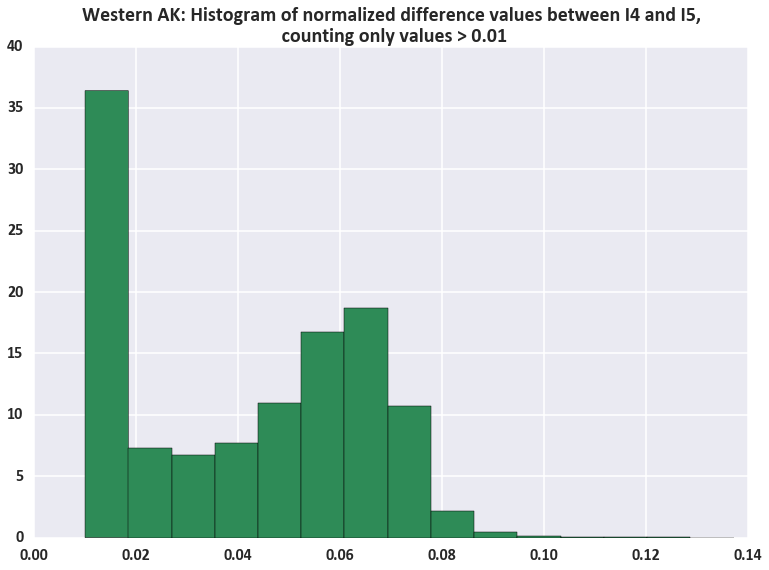

In [40]:
normdiffs = plotraster45.flatten()
values = normdiffs[normdiffs>0.01]
n, bins, patches = plt.hist(values, 15, normed=1, facecolor='seagreen') 
plt.title("Western AK: Histogram of normalized difference values between I4 and I5,\n counting only values > 0.01")

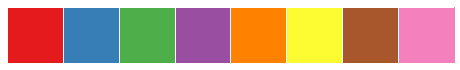

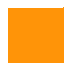

In [46]:
sns.palplot(sns.color_palette("Set1", n_colors=8))
sns.palplot(sns.xkcd_palette(['tangerine']))

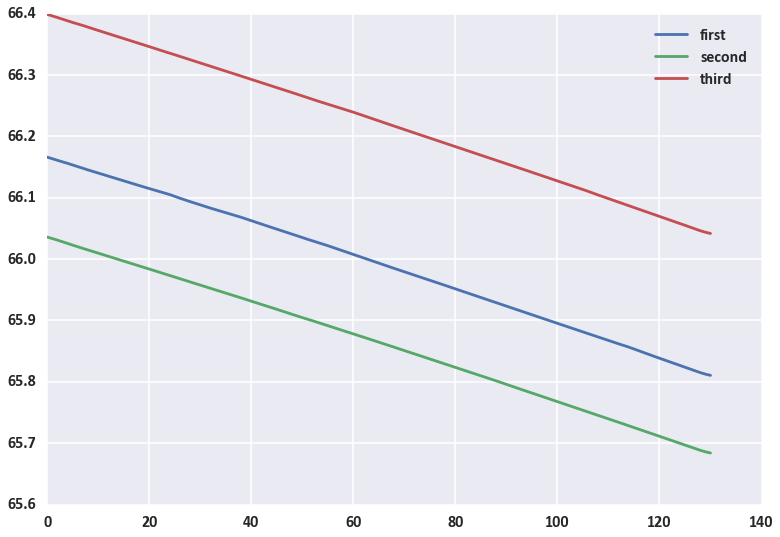

In [153]:
plt.plot(range(jmax-jmin), testscene04.lats[imin+50, jmin:jmax], label='first')
plt.plot(range(jmax-jmin), testscene04.lats[imin, jmin:jmax], label='second')
plt.plot(range(jmax-jmin), testscene04.lats[imax, jmin:jmax], label='third')
plt.legend()

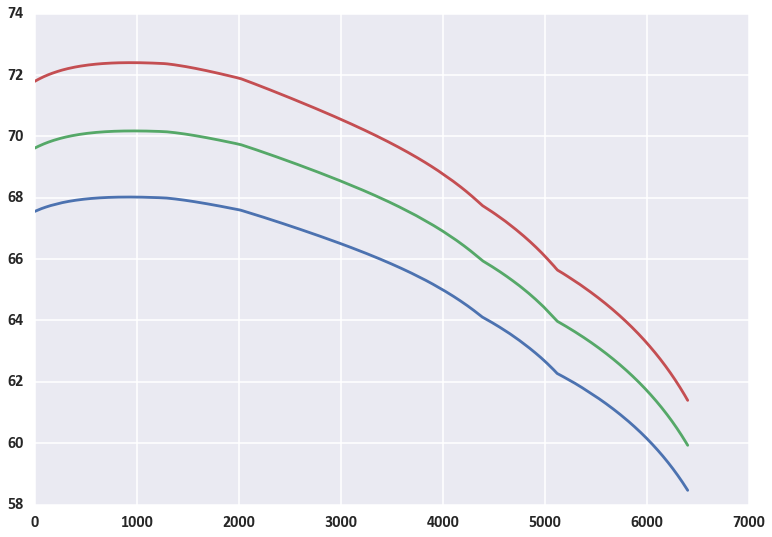

In [156]:
plt.plot(range(testscene04.lats.shape[1]), testscene04.lats[100, :])
plt.plot(range(testscene04.lats.shape[1]), testscene04.lats[testscene04.lats.shape[0]//2, :])
plt.plot(range(testscene04.lats.shape[1]), testscene04.lats[-100, :])

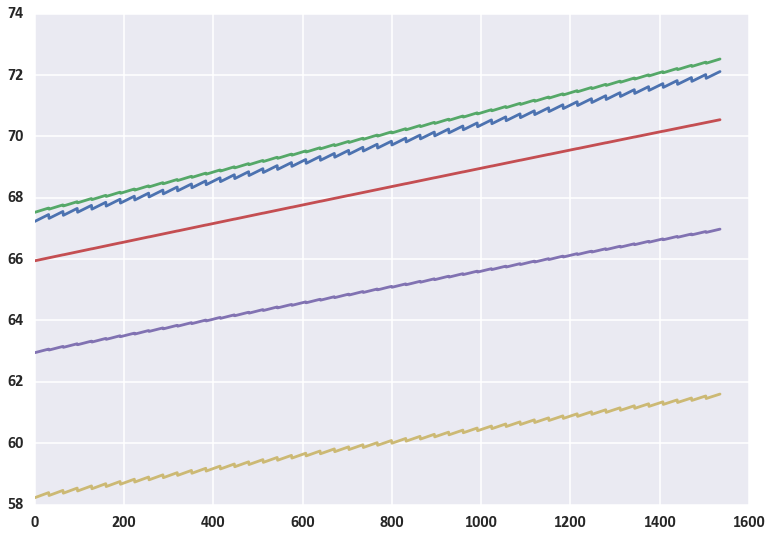

In [162]:
plt.plot(range(testscene04.lats.shape[0]), testscene04.lats[:, 1])
plt.plot(range(testscene04.lats.shape[0]), testscene04.lats[:, testscene04.lats.shape[1]//4])
plt.plot(range(testscene04.lats.shape[0]), testscene04.lats[:, testscene04.lats.shape[1]//2])
plt.plot(range(testscene04.lats.shape[0]), testscene04.lats[:, 3*testscene04.lats.shape[1]//4])
plt.plot(range(testscene04.lats.shape[0]), testscene04.lats[:, -1])

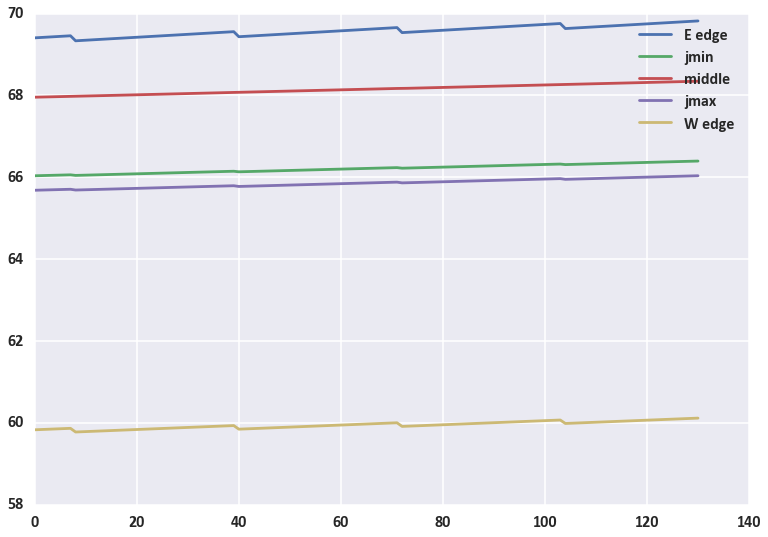

In [168]:
plt.plot(range(imax-imin), testscene04.lats[imin:imax, 10], label='E edge')
plt.plot(range(imax-imin), testscene04.lats[imin:imax, jmin], label='jmin')
plt.plot(range(imax-imin), testscene04.lats[imin:imax, testscene04.lats.shape[1]//2], label='middle')
plt.plot(range(imax-imin), testscene04.lats[imin:imax, jmax], label='jmax')
plt.plot(range(imax-imin), testscene04.lats[imin:imax, -10], label='W edge')
plt.legend()

In [23]:
dir()

['ALT1',
 'ALT2',
 'Basemap',
 'In',
 'OrderedDict',
 'Out',
 '_',
 '_10',
 '_15',
 '_17',
 '_18',
 '_20',
 '_3',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__name__',
 '__package__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'basedir',
 'cbarfraction',
 'cbarpad',
 'cmap1',
 'cmap2',
 'datestamp',
 'dt',
 'earth',
 'excluderows',
 'exit',
 'firegisdir',
 'fireperims',
 'font',
 'get_ipython',
 'gisbasedir',
 'glob',
 'hughes_lat',
 'hughes_lon',
 'i01paths',
 'i02paths',
 'i03paths',
 'i04file',
 'i04paths',
 'i05file',
 'i05paths',
 'id',
 'idx',
 'ii',
 'imax',
 'imin',
 'jmax',
 'jmin',
 'json',
 'matplotlib',
 'myfontsize',
 'np',
 'os',
 'pixq4',
 'pixq5',
 'plt',
 'print_function',
 'pygaarst',
 'quit',
 'raster',
 'rasterlist',
 're',
 'sample_lat',
